In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('/content/startup data.csv')

# Explore the dataset
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset, check for missing values

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  ...  \
0      San Diego                     NaN        Bandsintown       1  ...   
1      Los Gatos                     NaN          TriCipher       1  ...   
2      San Diego      San Diego CA 92121              Plixi       1  ...   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1  ...   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0  ...   

  object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
0    c:6669      0         1          0          

In [7]:
# Drop unnecessary columns including 'zip_code'
columns_to_drop = ['Unnamed: 0', 'id', 'city', 'Unnamed: 6', 'object_id', 'state_code.1']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Check if 'state_code' and 'category_code' columns exist in the DataFrame
if 'state_code' in data.columns and 'category_code' in data.columns:
    # Convert categorical variables into numerical representations using one-hot encoding
    data = pd.get_dummies(data, columns=['state_code', 'category_code'])

    # Handle missing values (if any) - for simplicity, you can drop rows with missing values
    data.dropna(inplace=True)

    # Separate features (X) and target variable (y)
    X = data.drop(columns=['status'])  # Features
    y = data['status']  # Target variable

    # Convert target variable into binary labels (1 for 'acquired' and 0 for 'closed')
    y = y.map({'acquired': 1, 'closed': 0})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    print("Columns 'state_code' and/or 'category_code' not found in the DataFrame.")


Columns 'state_code' and/or 'category_code' not found in the DataFrame.


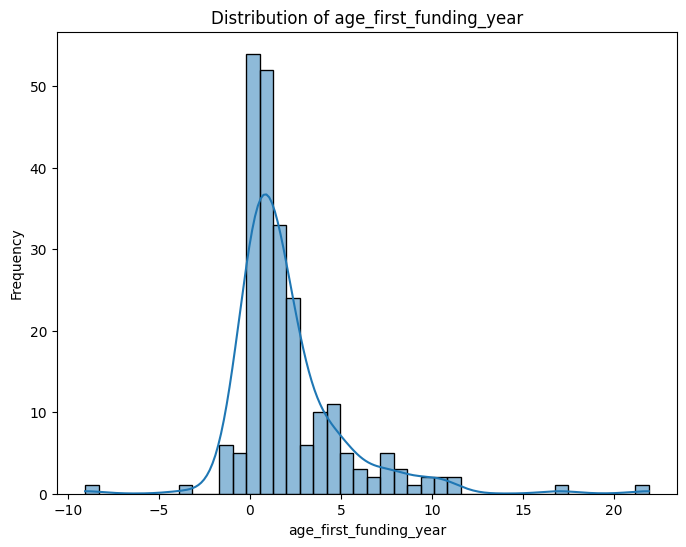

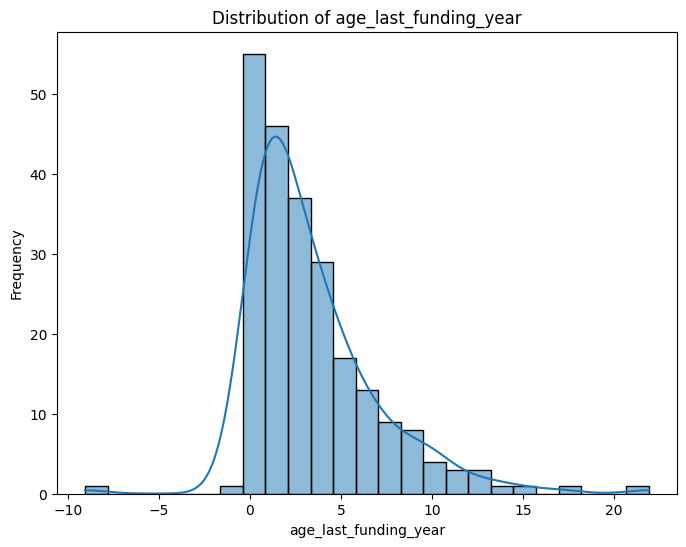

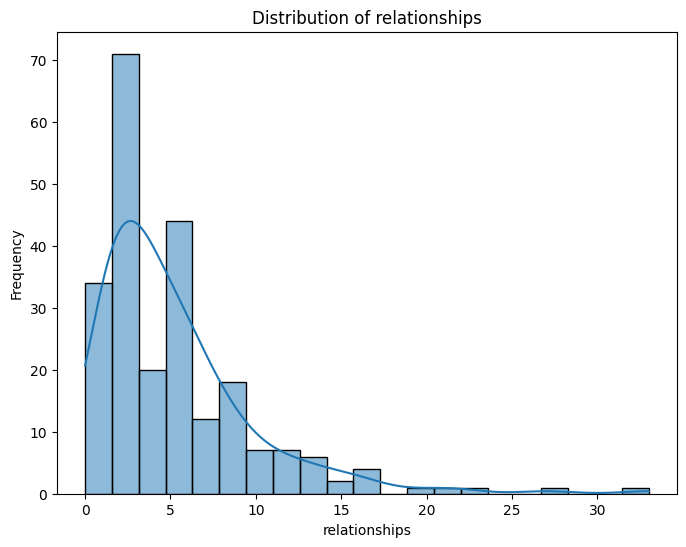

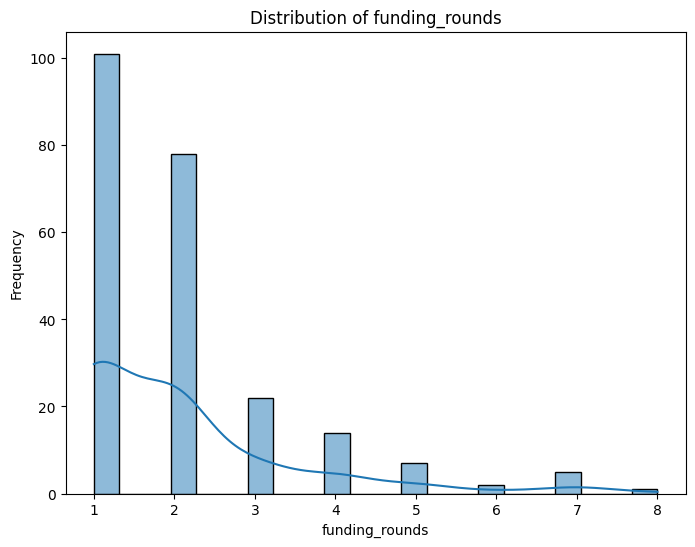

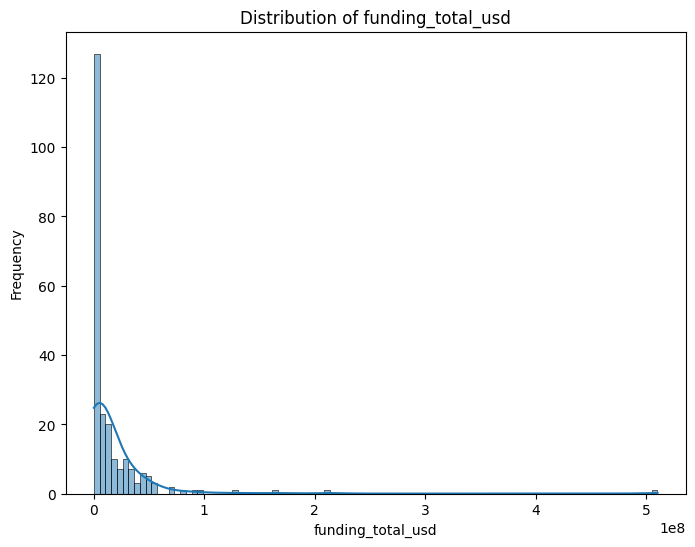

In [8]:
# Assuming you have loaded the dataset again with correct column names
# Perform exploratory data analysis (create histograms, box plots, etc.) for the selected columns
selected_columns = ['age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd']

# Visualize the distribution of selected columns
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Print the columns in your DataFrame and their data types
print(data.columns)
print(data.dtypes)

# Check if 'status' column is present in the DataFrame
if 'status' in data.columns:
    # Separate features (X) and target variable (y)
    X = data.drop(columns=['status'])  # Features
    y = data['status']  # Target variable

    # Convert target variable into binary labels (1 for 'acquired' and 0 for 'closed')
    y = y.map({'acquired': 1, 'closed': 0})

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the logistic regression model
    model = LogisticRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Apply one-hot encoding to X_test
    X_test_encoded = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=['object']).columns)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded)

In [39]:
# Drop unnecessary columns including 'zip_code'
columns_to_drop = ['Unnamed: 0', 'id', 'city', 'Unnamed: 6', 'object_id', 'state_code.1', 'zip_code']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Check if 'state_code' and 'category_code' columns exist in the DataFrame
if 'state_code' in data.columns and 'category_code' in data.columns:
    # Convert categorical variables into numerical representations using one-hot encoding
    data = pd.get_dummies(data, columns=['state_code', 'category_code'])

# Handle non-numeric values in remaining columns using one-hot encoding
non_numeric_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=non_numeric_cols)

# Handle missing values
data.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = data.drop(columns=['status_acquired', 'status_closed'])  # Features
y = data[['status_acquired', 'status_closed']]  # Target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model for each target variable
model_acquired = LogisticRegression()
model_closed = LogisticRegression()

# Fit the models on the training data for each target variable
model_acquired.fit(X_train, y_train['status_acquired'])
model_closed.fit(X_train, y_train['status_closed'])

# Make predictions on the test set for each target variable
y_pred_acquired = model_acquired.predict(X_test)
y_pred_closed = model_closed.predict(X_test)

# Calculate accuracy for each target variable
accuracy_acquired = accuracy_score(y_test['status_acquired'], y_pred_acquired)
accuracy_closed = accuracy_score(y_test['status_closed'], y_pred_closed)

print("Accuracy (Acquired):", accuracy_acquired)
print("Accuracy (Closed):", accuracy_closed)

Accuracy (Acquired): 0.9565217391304348
Accuracy (Closed): 0.9565217391304348


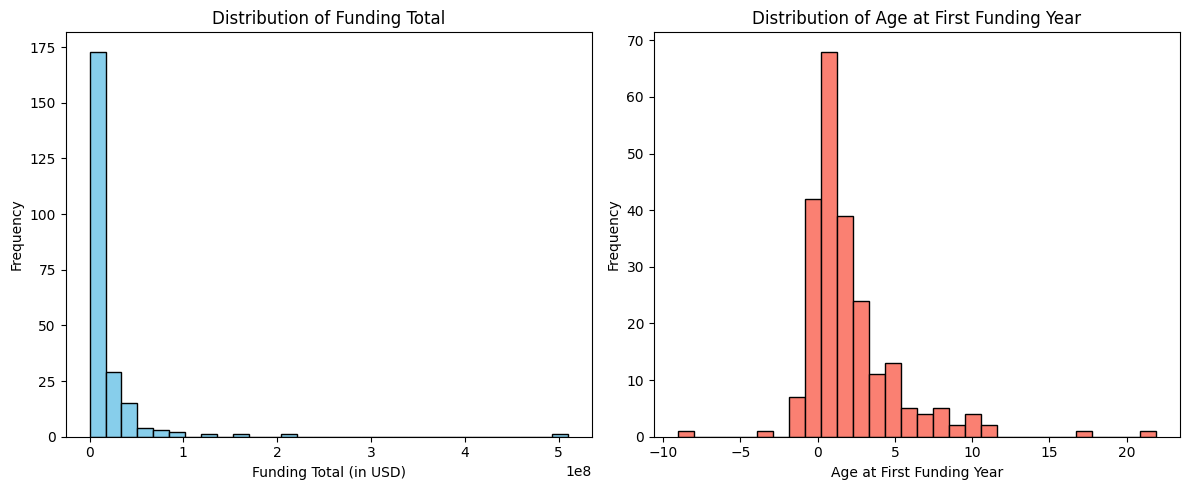

In [40]:
import matplotlib.pyplot as plt

# Create histograms for 'funding_total_usd' and 'age_first_funding_year'
plt.figure(figsize=(12, 5))

# Histogram for 'funding_total_usd'
plt.subplot(1, 2, 1)
plt.hist(data['funding_total_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Funding Total (in USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Funding Total')

# Histogram for 'age_first_funding_year'
plt.subplot(1, 2, 2)
plt.hist(data['age_first_funding_year'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.xlabel('Age at First Funding Year')
plt.ylabel('Frequency')
plt.title('Distribution of Age at First Funding Year')

plt.tight_layout()
plt.show()
